# Define the problem

In [5]:
from scipy import stats
import numpy as np

In [1]:
modified = [16.85,16.4,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57]
unmodified = [16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27]

# Calculate basic statistics

In [11]:
n = len(modified)

In [56]:
# Calculate mean, std and variance
modified_mean, unmodified_mean = np.mean(modified), np.mean(unmodified)
modified_var, unmodified_var = np.var(modified, ddof=1), np.var(unmodified, ddof=1)
modified_std, unmodified_std = np.std(modified, ddof=1), np.std(unmodified, ddof=1)

In [57]:
modified_mean, unmodified_mean

(16.764000000000003, 17.042000000000005)

In [58]:
modified_std, unmodified_std

(0.31644553682707827, 0.24791575630084936)

# Assuming we know the variance

In [59]:
# If we suppose the variance is 0.3
z = (modified_mean - unmodified_mean) / np.sqrt(0.3**2/n + 0.3**2/n)
z

-2.072089659149822

In [60]:
# Find the p-vallue
p_value = (1 - stats.norm(0,1).cdf(np.abs(z))) * 2
p_value

0.038257080521597375

# Pooled t-test

In [61]:
pooled_var = ((n-1)*modified_var + (n-1)*unmodified_var) / (n+n-2)
pooled_var

0.08079999999999994

In [62]:
pooled_std = np.sqrt(pooled_var)
pooled_std

0.2842534080710378

In [72]:
t = (modified_mean - unmodified_mean) / (pooled_std*np.sqrt(1/n+1/n))
t

-2.1868757949582633

In [82]:
df = 2*n-2
t_dist = stats.t(df)

In [89]:
critical_region = t_dist.ppf(0.025)
critical_region

-2.10092204024096

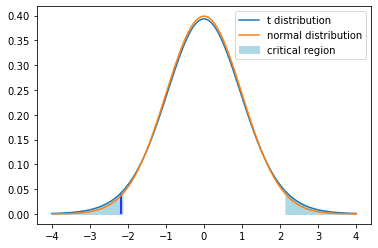

In [116]:
from matplotlib import pyplot as plt

x = np.linspace(-4,4,100)
plt.plot(x, t_dist.pdf(x), label='t distribution')
plt.plot(x, stats.norm(0,1).pdf(x), label='normal distribution')

# Critical region
critical_x = x[x < critical_region]
plt.fill_between(critical_x, t_dist.pdf(critical_x), color="lightblue", label='critical region')

critical_x = x[x > -critical_region]
plt.fill_between(critical_x, t_dist.pdf(critical_x), color="lightblue")

# t value
plt.vlines(t, 0, 0.04, 'b')


plt.legend()

In [90]:
# t is inside the critical_region, hence we can reject the null hypothesis
t < critical_region

True

## Calculate the p-value

In [118]:
2*t_dist.cdf(t)

0.0421967159248899

## Normal plot

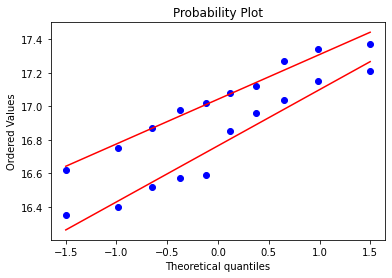

In [139]:
stats.probplot(modified, dist='norm', plot=plt)
stats.probplot(unmodified, dist='norm', plot=plt)
plt.show()

## Confidence interval

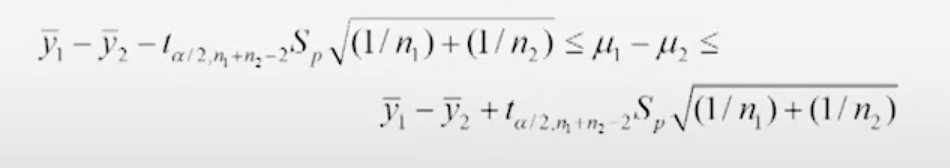

In [147]:
# Upper
modified_mean-unmodified_mean-(t*pooled_std*np.sqrt(1/n+1/n))

-5.551115123125783e-17

In [148]:
# Lower
modified_mean-unmodified_mean+(t*pooled_std*np.sqrt(1/n+1/n))

-0.5560000000000045

## Test if we get the same result combining the datasets

In [65]:
# Test if we get the same result combining the datasets
pooled_data = modified + unmodified
np.var(pooled_data, ddof=1)

0.09688526315789472

The result is not the same as if we combined the data

# Using scipy ttest_ind

In [4]:
from scipy.stats import ttest_ind
ttest_ind(modified, unmodified, axis=0, equal_var=True)

Ttest_indResult(statistic=-2.1868757949582633, pvalue=0.0421967159248899)